In [10]:
#importar a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#definindo tamanho da fonte para os graficos
plt.rcParams.update({'font.size':14})

In [12]:
#Leitura do arquivo
df = pd.read_excel("datasets/gravimetria_rsu_usina_sjb.xlsx")

In [13]:
#Exibindo as municipios do CMM
df.head(7)

,CD_MUN,Cidade,Ano,Latitude,Longitude,Populacao,Valor Bruto RSU (ton/dia),Kg.hab.dia,Cobranca,Matéria orgânica,...,Fraldas e papel higiênico,Alumínio,Diversos,Borrachas,Papel branco,Espumas,Subtotal,Perdas do processo,TOTAL,Umidade
0,3517703,Guará,2021,-20.429380,-47.824827,20626,14.32,0.694269,Sim,0.405,...,0.141,0.006,0.017,0.006,0.031,0.004,0.996,0.004,1,0.202
1,3521309,Ipuâ,2021,-20.447951,-48.014793,15917,10.88,0.683546,Sim,0.392,...,0.166,0.005,0.018,0.005,0.033,0.004,0.997,0.003,1,0.191
2,3536307,Patrocinio Paulista,2021,-20.641255,-47.281866,11958,8.21,0.686570,Sim,0.411,...,0.151,0.007,0.015,0.006,0.031,0.001,0.994,0.006,1,0.205
3,3543105,Ribeirão Corrente,2021,-20.458270,-47.589949,3778,2.61,0.690842,Sim,0.416,...,0.161,0.005,0.015,0.005,0.032,0.005,0.996,0.004,1,0.235
4,3544905,Sales Oliveira,2021,-20.771135,-47.839645,10864,7.47,0.687592,Sim,0.387,...,0.168,0.004,0.017,0.006,0.032,0.002,0.995,0.005,1,0.185
5,3549409,São Joaquim da Barra,2021,-20.577498,-47.876527,51382,40.42,0.786657,Sim,0.422,...,0.142,0.007,0.016,0.007,0.033,0.004,0.995,0.006,1,0.241
6,3549508,São José da Bela Vista,2021,-20.598759,-47.641875,7979,5.54,0.694323,Sim,0.389,...,0.156,0.007,0.018,0.006,0.034,0.002,0.995,0.005,1,0.172


In [14]:
cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']
colors_blue = ['#8AA3CC', '#668DC2', '#4C7DB7', '#4774AB', '#416C9F', '#3A6190', '#33567F']
colors_rsu = ['#F58220', '#555A69', '#A5C8D0', '#2692D1', '#01976C', '#FDBA4D', '#24333E', '#B1B4B6', '#C25228']
ton = df["Valor Bruto RSU (ton/dia)"]
kg = df["Kg.hab.dia"]
cidades = df["Cidade"]
organicos = (df["Matéria orgânica"].sum() / 7) * 100
reciclaveis = (df["Reciclaveis"].sum() / 7) * 100
perdas = (df["Perdas do processo"].sum() / 7) * 100
explode = [0, 0, 0, 0, 0, 0, 0]

# 9. TESTES DIVERSOS

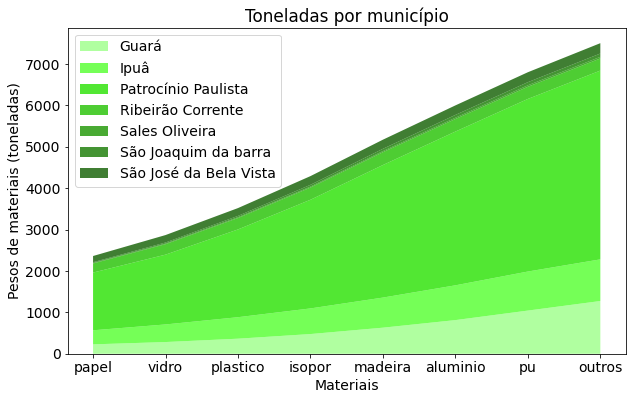

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
#year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
material = ['papel', 'vidro', 'plastico', 'isopor', 'madeira', 'aluminio', 'pu', 'outros']
population_by_continent = {
    'Guará': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'Ipuâ': [340, 425, 519, 619, 727, 840, 943, 1006],
    'Patrocínio Paulista': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'Ribeirão Corrente': [220, 253, 276, 295, 310, 303, 294, 293],
    'Sales Oliveira': [12, 15, 19, 22, 26, 31, 36, 39],
    'São Joaquim da barra': [18, 25, 32, 44, 56, 68, 75, 80],
    'São José da Bela Vista': [150, 180, 189, 210, 220, 230, 240, 250],
}

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(material, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8, colors=colors_green)
ax.legend(loc='upper left')
ax.set_title('Toneladas por município')
ax.set_xlabel('Materiais')
ax.set_ylabel('Pesos de materiais (toneladas)')

plt.savefig('imagens/outros/toneladas-por-municipio.png', dpi=600, bbox_inches='tight')

plt.show()

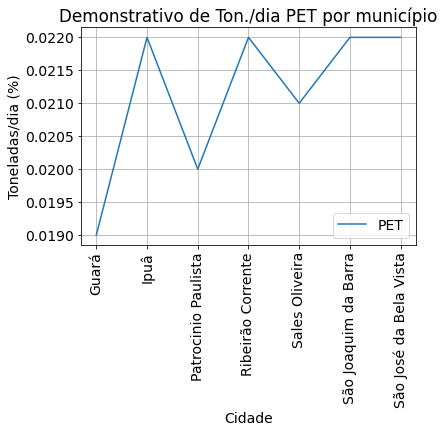

In [16]:
df.groupby(df["Cidade"])["PET"].sum().plot(title = 'Demonstrativo de Ton./dia PET por município')
plt.xlabel("Cidade")
plt.ylabel("Toneladas/dia (%)");

plt.xticks(rotation=90)
plt.grid(True)

plt.savefig('imagens/outros/histograma-toneladas-pets.png', dpi=600, bbox_inches='tight')
plt.legend()

Rectangle(xy=(-0.4, 0), width=0.8, height=14.32, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=10.88, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=8.21, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=2.61, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=7.47, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=40.42, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=5.54, angle=0)


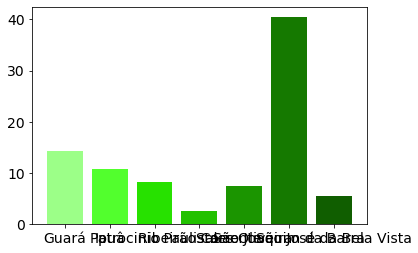

In [17]:
#Visualizando somente cidades e total de tonelada
cidade = df['Cidade']
tonelada = df['Valor Bruto RSU (ton/dia)']
plot = plt.bar(cidade, tonelada, color=colors_green)
for i in plot.patches:
    print(i)
#    plot.annotate(i.get_height(),
#                  (i.get_x() + i.get_width() / 2, i.get_height()), 
#                  ha='center', va='baseline', fontsize=12, 
#                  color='black', xytext=(0,1), 
#                  textcoords='offset points')   

plt.savefig('imagens/outros/outros1.png', dpi=600, bbox_inches='tight')


  cidades  toneladas
0       A         14
1       B         10
2       C          8
3       D          2
4       E          7
5       F         40
6       G          5


[Text(0, 0, '14'),
 Text(0, 0, '10'),
 Text(0, 0, '8'),
 Text(0, 0, '2'),
 Text(0, 0, '7'),
 Text(0, 0, '40'),
 Text(0, 0, '5')]

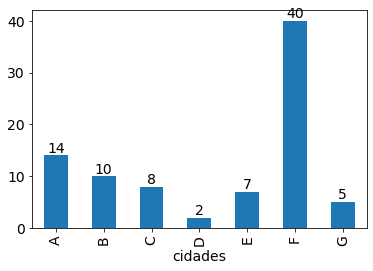

In [18]:
#create DataFrame
df3 = pd.DataFrame({'cidades': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                   'toneladas': [14, 10, 8, 2, 7, 40, 5]})

#view DataFrame
print(df3)

 
#create bar plot to visualize sales by product
ax = df3.plot.bar(x='cidades', y='toneladas', legend=False)

plt.savefig('imagens/outros/outros2.png', dpi=600, bbox_inches='tight')


#annotate bars
ax.bar_label(ax.containers[0])

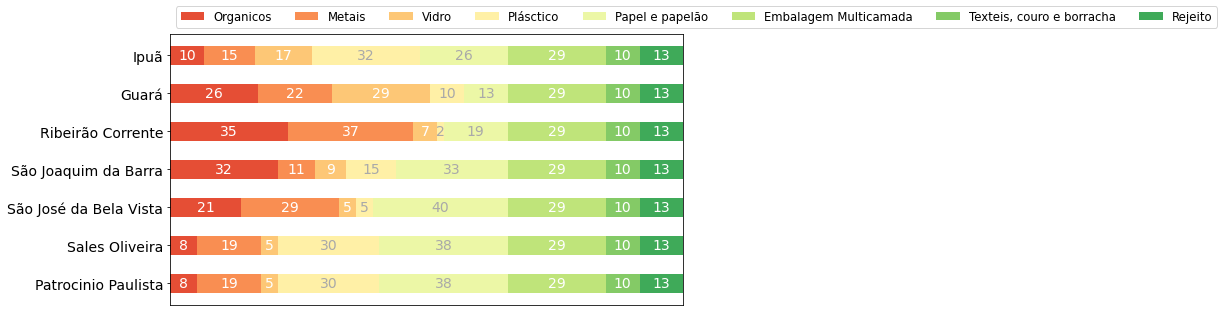

In [19]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Organicos', 'Metais','Vidro', 'Plásctico', 'Papel e papelão', 'Embalagem Multicamada',
                  'Texteis, couro e borracha', 'Rejeito']
results = {
    'Ipuã': [10, 15, 17, 32, 26, 29, 10, 13],
    'Guará': [26, 22, 29, 10, 13, 29, 10, 13],
    'Ribeirão Corrente': [35, 37, 7, 2, 19, 29, 10, 13],
    'São Joaquim da Barra': [32, 11, 9, 15, 33, 29, 10, 13],
    'São José da Bela Vista': [21, 29, 5, 5, 40, 29, 10, 13],
    'Sales Oliveira': [8, 19, 5, 30, 38, 29, 10, 13],
    'Patrocinio Paulista': [8, 19, 5, 30, 38, 29, 10, 13]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)

plt.savefig('imagens/outros/outros3.png', dpi=600, bbox_inches='tight')

plt.show()

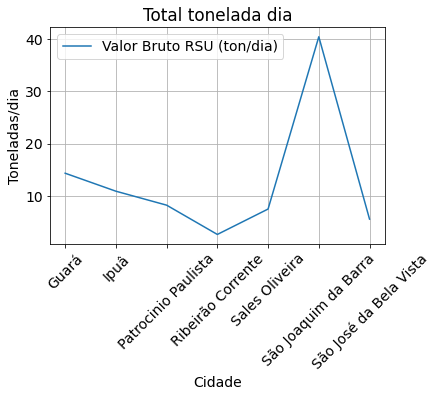

In [20]:
df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum().plot(title = 'Total tonelada dia')
plt.xlabel("Cidade")
plt.ylabel("Toneladas/dia");

plt.xticks(rotation=45)
plt.grid(True)

plt.savefig('imagens/outros/outros4.png', dpi=600, bbox_inches='tight')


plt.legend()

In [21]:
#Vidros por cidade
variavel = df.groupby(df["Cidade"])["Vidros"].sum()
cidades = df["Cidade"]

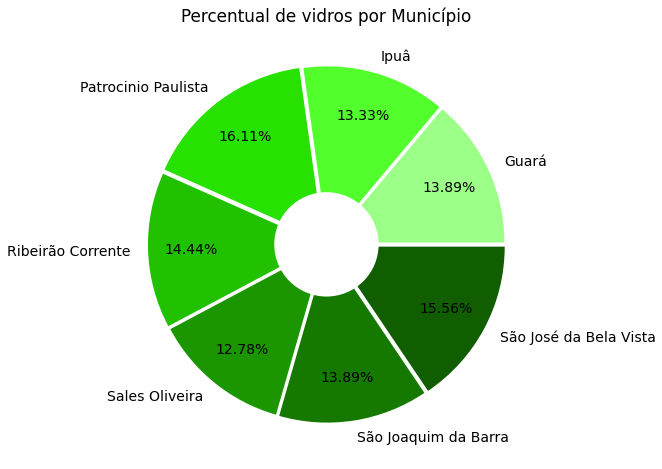

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))
  
# Pie Chart
plt.pie(variavel, colors=colors_green, labels=cidades,
        autopct='%1.2f%%', pctdistance=0.75,
        explode=variavel)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
plt.title('Percentual de vidros por Município')

plt.savefig('imagens/outros/outros5.png', dpi=600, bbox_inches='tight')

plt.show() 

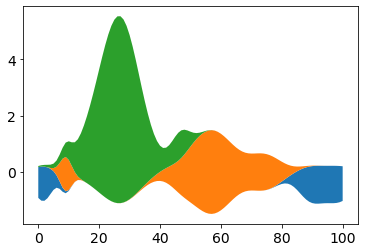

In [23]:
# Fixing random state for reproducibility
np.random.seed(19680801)

def gaussian_mixture(x, n=5):
    """Return a random mixture of *n* Gaussians, evaluated at positions *x*."""
    def add_random_gaussian(a):
        amplitude = 1 / (.1 + np.random.random())
        dx = x[-1] - x[0]
        x0 = (2 * np.random.random() - .5) * dx
        z = 10 / (.1 + np.random.random()) / dx
        a += amplitude * np.exp(-(z * (x - x0))**2)
    a = np.zeros_like(x)
    for j in range(n):
        add_random_gaussian(a)
    return a


x = np.linspace(0, 100, 101)
ys = [gaussian_mixture(x) for _ in range(3)]

fig, ax = plt.subplots()
ax.stackplot(x, ys, baseline='wiggle')

plt.savefig('imagens/outros/outros6.png', dpi=600, bbox_inches='tight')

plt.show()

In [24]:
def autolabel(grupos):
    for i in grupos:
        h = i.get_height()
        ax.annotate('{}'.format(h),
                xy = (i.get_x()+i.get_width()/2,h),
                xytext = (0,9),
                textcoords='offset points',
                ha = 'center')

In [25]:
times = ['Time A','Time B','Time C','Time D']

In [26]:
pontuacao_mulheres = [95,82,67,80]
pontuacao_homens = [80,91,77,65]

In [27]:
x = np.arange(len(times))
x

array([0, 1, 2, 3])

In [28]:
largura = 0.35

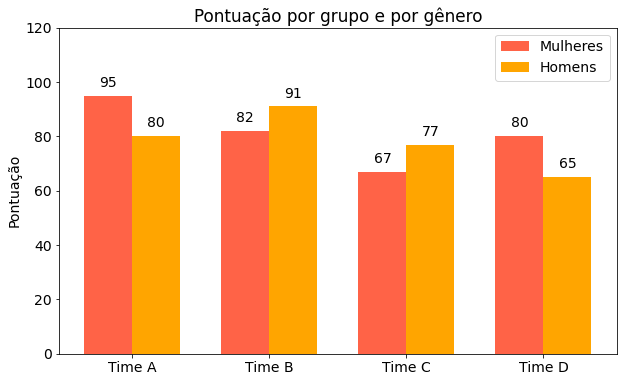

In [29]:
fig, ax = plt.subplots(figsize = (10,6))

grupo1 = ax.bar(x - largura/2,pontuacao_mulheres, largura,  label = 'Mulheres', color = 'tomato')
grupo2 = ax.bar(x + largura/2,pontuacao_homens, largura, label = 'Homens', color = 'orange')

ax.set_title('Pontuação por grupo e por gênero')
ax.set_ylabel('Pontuação')

ax.legend()

ax.set_ylim([0,120])

ax.set_xticks(x)
ax.set_xticklabels(times)

autolabel(grupo1)
autolabel(grupo2)

plt.show()

## Valores de orgânicos, recicláveis e rejeito por municipio

In [30]:
def autolabel2(tipos):
    for i in tipos:
        h = i.get_height()
        # ax.annotate('{}'.format(h),
        ax.annotate('{:1.2f}'.format(h),
                xy = (i.get_x()+i.get_width()/2,h),
                xytext = (0,9),
                textcoords='offset points',
                ha = 'center')

In [31]:
#Leitura do arquivo
df = pd.read_excel("datasets/gravimetria_rsu_usina_sjb.xlsx")

In [32]:
df

,CD_MUN,Cidade,Ano,Latitude,Longitude,Populacao,Valor Bruto RSU (ton/dia),Kg.hab.dia,Cobranca,Matéria orgânica,...,Fraldas e papel higiênico,Alumínio,Diversos,Borrachas,Papel branco,Espumas,Subtotal,Perdas do processo,TOTAL,Umidade
0,3517703,Guará,2021,-20.429380,-47.824827,20626,14.32,0.694269,Sim,0.405,...,0.141,0.006,0.017,0.006,0.031,0.004,0.996,0.004,1,0.202
1,3521309,Ipuâ,2021,-20.447951,-48.014793,15917,10.88,0.683546,Sim,0.392,...,0.166,0.005,0.018,0.005,0.033,0.004,0.997,0.003,1,0.191
2,3536307,Patrocinio Paulista,2021,-20.641255,-47.281866,11958,8.21,0.686570,Sim,0.411,...,0.151,0.007,0.015,0.006,0.031,0.001,0.994,0.006,1,0.205
3,3543105,Ribeirão Corrente,2021,-20.458270,-47.589949,3778,2.61,0.690842,Sim,0.416,...,0.161,0.005,0.015,0.005,0.032,0.005,0.996,0.004,1,0.235
4,3544905,Sales Oliveira,2021,-20.771135,-47.839645,10864,7.47,0.687592,Sim,0.387,...,0.168,0.004,0.017,0.006,0.032,0.002,0.995,0.005,1,0.185
5,3549409,São Joaquim da Barra,2021,-20.577498,-47.876527,51382,40.42,0.786657,Sim,0.422,...,0.142,0.007,0.016,0.007,0.033,0.004,0.995,0.006,1,0.241
6,3549508,São José da Bela Vista,2021,-20.598759,-47.641875,7979,5.54,0.694323,Sim,0.389,...,0.156,0.007,0.018,0.006,0.034,0.002,0.995,0.005,1,0.172


In [33]:
materiais = df[['Cidade','Matéria orgânica', 'Reciclaveis', 'Rejeito']]
materiais

,Cidade,Matéria orgânica,Reciclaveis,Rejeito
0,Guará,0.405,0.402,0.193
1,Ipuâ,0.392,0.398,0.210
2,Patrocinio Paulista,0.411,0.394,0.195
3,Ribeirão Corrente,0.416,0.374,0.210
4,Sales Oliveira,0.387,0.399,0.214
5,São Joaquim da Barra,0.422,0.387,0.191
6,São José da Bela Vista,0.389,0.406,0.205


In [34]:
#Salva o Dataframe da gravimetria dos RSU em arquivo
materiais.to_excel("datasets/tipos_rsu_cmm.xlsx")

In [35]:
cidades = df['Cidade']

In [36]:
valores_organico = df['Matéria orgânica'] * 100
valores_reciclaveis = df['Reciclaveis'] * 100
valores_rejeito = df['Rejeito'] * 100

In [37]:
valores_organico

0    40.5
1    39.2
2    41.1
3    41.6
4    38.7
5    42.2
6    38.9
Name: Matéria orgânica, dtype: float64

In [38]:
valores_reciclaveis

0    40.2
1    39.8
2    39.4
3    37.4
4    39.9
5    38.7
6    40.6
Name: Reciclaveis, dtype: float64

In [39]:
valores_rejeito

0    19.3
1    21.0
2    19.5
3    21.0
4    21.4
5    19.1
6    20.5
Name: Rejeito, dtype: float64

In [40]:
x = np.arange(len(cidades))
x

array([0, 1, 2, 3, 4, 5, 6])

In [41]:
largura=0.40

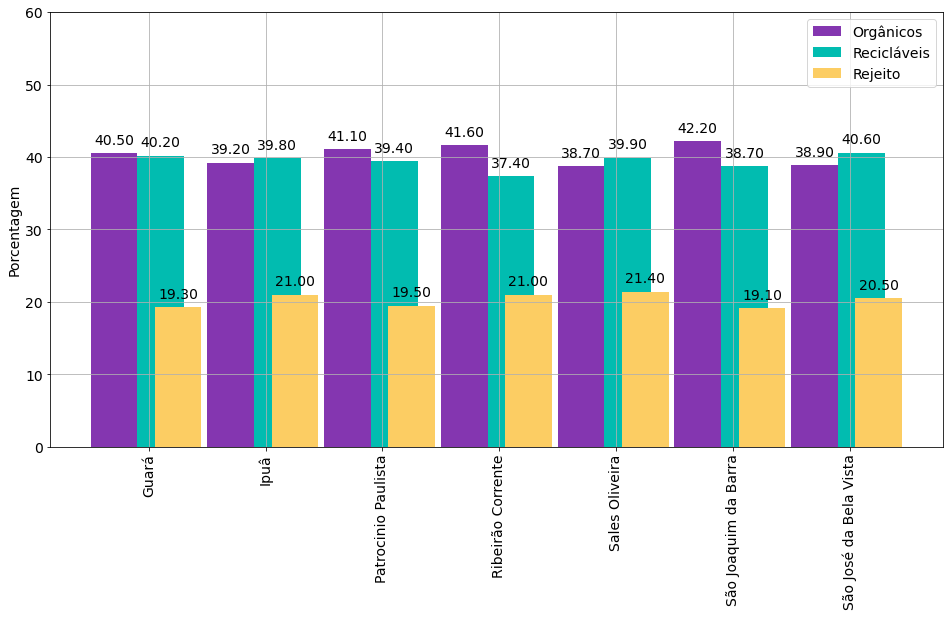

In [50]:
fig, ax = plt.subplots(figsize = (16,8))

# cidades = ['Cidade 1','Cidade 2','Cidade 3','Cidade 4', 'Cidade 5','Cidade 6', 'Cidade 7']


# tipo1 = ax.bar(x - largura+0.10,valores_organico, largura,  label = 'Orgânicos', color = 'turquoise')
# tipo2 = ax.bar(x - largura+0.50,valores_reciclaveis, largura, label = 'Recicláveis', color = 'tomato')
# tipo3 = ax.bar(x - largura+0.65,valores_rejeito, largura, label = 'Rejeito', color = 'orange')

# tipo1 = ax.bar(x - largura+0.10,valores_organico, largura,  label = 'Orgânicos', color = 'deepskyblue')
# tipo2 = ax.bar(x - largura+0.50,valores_reciclaveis, largura, label = 'Recicláveis', color = 'dodgerblue')
# tipo3 = ax.bar(x - largura+0.65,valores_rejeito, largura, label = 'Rejeito', color = 'steelblue')

tipo1 = ax.bar(x - largura+0.10,valores_organico, largura,  label = 'Orgânicos', color = '#8436B0')
tipo2 = ax.bar(x - largura+0.50,valores_reciclaveis, largura, label = 'Recicláveis', color = '#01BCB0')
tipo3 = ax.bar(x - largura+0.65,valores_rejeito, largura, label = 'Rejeito', color = '#FCCD63')



# ax.set_title('Porcentagem de Tipo de RSU por Município')
ax.set_ylabel('Porcentagem')

ax.legend()

ax.set_ylim([0,60])

ax.set_xticks(x)
ax.set_xticklabels(cidades, rotation = 90)

autolabel2(tipo1)
autolabel2(tipo2)
autolabel2(tipo3)

plt.grid()

plt.savefig('imagens/graficos/tipos-bar-porcentagem-topo.png', dpi=600, bbox_inches='tight')


plt.show()

## Cores

In [43]:
!pip install colorspacious

In [44]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

In [45]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

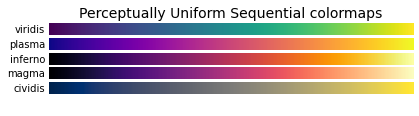

In [46]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

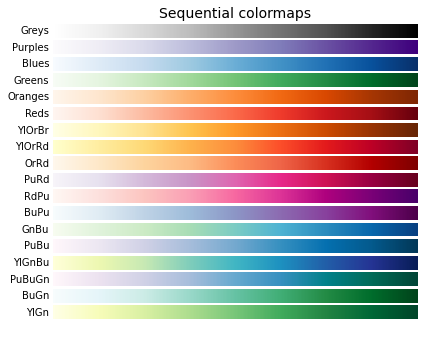

In [7]:
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

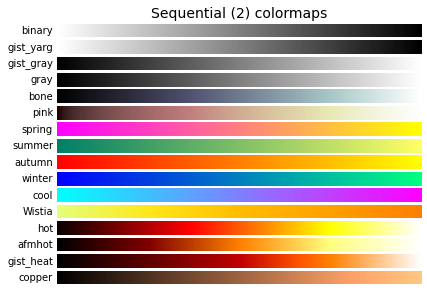

In [8]:
plot_color_gradients('Sequential (2)',
                     ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'])

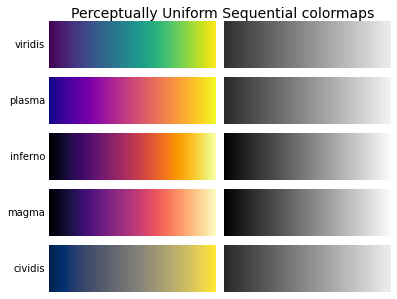

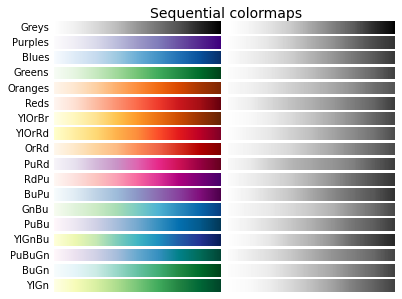

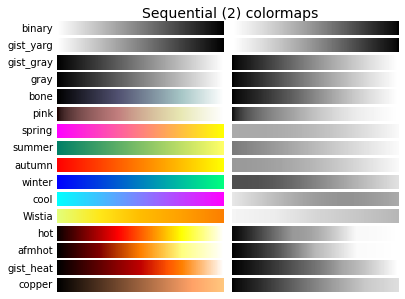

In [9]:
mpl.rcParams.update({'font.size': 14})

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    fig, axs = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axs, cmap_list):

        # Get RGB values for colormap.
        rgb = mpl.colormaps[name](x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs.flat:
        ax.set_axis_off()

    plt.show()


for cmap_category, cmap_list in cmaps.items():

    plot_color_gradients(cmap_category, cmap_list)